In [71]:
#pip install seaborn

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
import yfinance as yf


# List of bank stock tickers (NSE)
tickers = [
    "HDFCBANK.NS",  # HDFC Bank Ltd
    "ICICIBANK.NS",  # ICICI Bank Ltd
    "KOTAKBANK.NS",  # Kotak Mahindra Bank Ltd
    "SBIN.NS",       # State Bank of India
    "AXISBANK.NS"    # Axis Bank Ltd
]

# Create a list to store individual DataFrames
dataframes = []

# Loop through each ticker and fetch the historical data
for ticker in tickers:
    stock = yf.Ticker(ticker)
    hist = stock.history(period="5y")
    
    # Add a column for the ticker symbol
    hist['Ticker'] = ticker
    
    # Append the DataFrame to the list
    dataframes.append(hist)

# Concatenate all DataFrames into a single DataFrame
all_hist = pd.concat(dataframes)

# Print the combined historical market data
print(all_hist)

# Export the data to a CSV file
all_hist.to_csv('bank_stocks_historical_data.csv')

print("Data exported to bank_stocks_historical_data.csv")


                                  Open         High          Low        Close  \
Date                                                                            
2019-09-27 00:00:00+05:30  1198.293233  1203.333121  1188.069438  1194.405273   
2019-09-30 00:00:00+05:30  1179.621748  1190.373462  1167.813965  1178.325684   
2019-10-01 00:00:00+05:30  1182.213613  1204.773109  1172.229812  1198.821289   
2019-10-03 00:00:00+05:30  1190.325341  1194.021353  1167.669871  1174.581787   
2019-10-04 00:00:00+05:30  1187.157616  1189.989506  1137.862736  1142.086548   
...                                ...          ...          ...          ...   
2024-09-23 00:00:00+05:30  1251.500000  1252.449951  1240.550049  1246.800049   
2024-09-24 00:00:00+05:30  1241.099976  1247.099976  1235.349976  1239.550049   
2024-09-25 00:00:00+05:30  1238.000000  1271.000000  1231.099976  1268.099976   
2024-09-26 00:00:00+05:30  1267.550049  1281.650024  1262.250000  1277.099976   
2024-09-27 00:00:00+05:30  1

In [74]:
df_stock = pd.read_csv('bank_stocks_historical_data.csv')

In [75]:

line_brack ="================================================================================================================="
colors = ['lightcoral', 'lightblue', 'lightgreen', 'peachpuff', 'lavender', 'mintcream', 'palegoldenrod', 'thistle', 'lightyellow', 'skyblue', 'lightpink', 'honeydew', 'lavenderblush']


In [76]:
v = df_stock['Ticker'].unique()
print(df_stock['Ticker'].unique())
print(line_brack)


# Print unique tickers
print("Unique Tickers:")
print(df_stock['Ticker'].unique())
print("\n")  # Line break

# Take input from user
stock_name = input(print(f"Please enter a stock ticker: {v}") )

['HDFCBANK.NS' 'ICICIBANK.NS' 'KOTAKBANK.NS' 'SBIN.NS' 'AXISBANK.NS']
Unique Tickers:
['HDFCBANK.NS' 'ICICIBANK.NS' 'KOTAKBANK.NS' 'SBIN.NS' 'AXISBANK.NS']


Please enter a stock ticker: ['HDFCBANK.NS' 'ICICIBANK.NS' 'KOTAKBANK.NS' 'SBIN.NS' 'AXISBANK.NS']


In [77]:
print(df_stock.columns)

print(df_stock.index)

print(df_stock.dtypes)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Ticker'],
      dtype='object')
RangeIndex(start=0, stop=6190, step=1)
Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
Ticker           object
dtype: object


# General Overview

### 1. What are the dimensions of the DataFrame?

In [78]:
df_stock.shape

(6190, 9)

### 2. What are the column names?

In [79]:
df_stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Ticker'],
      dtype='object')

### 3. What are the data types of each column?


In [80]:
df_stock.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
Ticker           object
dtype: object

### 4. How many missing values are in each column?


In [81]:
df_stock.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Ticker          0
dtype: int64

### 5. What is the summary statistics of numerical columns?


In [82]:
df_stock.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,6190.000000,6190.000000,6190.000000,6190.000000,6.190000e+03,6190.000000,6190.0
mean,1026.117843,1036.879321,1014.297875,1025.692287,1.639194e+07,0.022472,0.0
std,514.235178,518.412692,509.700492,514.111397,1.770663e+07,0.519717,0.0
min,143.022088,144.198637,140.668959,141.986710,1.976090e+05,0.000000,0.0
25%,589.350294,593.951164,581.572210,587.958054,6.154360e+06,0.000000,0.0
50%,920.535227,928.085310,912.381537,920.421539,1.118955e+07,0.000000,0.0
75%,1487.298459,1502.903209,1475.022846,1489.910889,1.951846e+07,0.000000,0.0
max,2194.462367,2247.328961,2171.121365,2205.384521,2.868577e+08,19.500000,0.0


### 6. What are the unique values in the `Ticker` column?


In [83]:
df_stock['Ticker'].unique()

array(['HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'SBIN.NS',
       'AXISBANK.NS'], dtype=object)

In [84]:
df_stock[df_stock['Ticker'] == stock_name]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
0,2019-09-27 00:00:00+05:30,1198.293233,1203.333121,1188.069438,1194.405273,7436585,0.0,0.0,HDFCBANK.NS
1,2019-09-30 00:00:00+05:30,1179.621748,1190.373462,1167.813965,1178.325684,9109229,0.0,0.0,HDFCBANK.NS
2,2019-10-01 00:00:00+05:30,1182.213613,1204.773109,1172.229812,1198.821289,9384176,0.0,0.0,HDFCBANK.NS
3,2019-10-03 00:00:00+05:30,1190.325341,1194.021353,1167.669871,1174.581787,8149438,0.0,0.0,HDFCBANK.NS
4,2019-10-04 00:00:00+05:30,1187.157616,1189.989506,1137.862736,1142.086548,9201816,0.0,0.0,HDFCBANK.NS
...,...,...,...,...,...,...,...,...,...
1233,2024-09-23 00:00:00+05:30,1749.000000,1766.349976,1740.250000,1759.800049,13482675,0.0,0.0,HDFCBANK.NS
1234,2024-09-24 00:00:00+05:30,1765.000000,1781.650024,1754.250000,1768.050049,16519518,0.0,0.0,HDFCBANK.NS
1235,2024-09-25 00:00:00+05:30,1760.150024,1788.000000,1760.150024,1779.099976,15982656,0.0,0.0,HDFCBANK.NS
1236,2024-09-26 00:00:00+05:30,1773.050049,1788.000000,1768.050049,1783.449951,15949822,0.0,0.0,HDFCBANK.NS


### 7. What is the date range covered in the dataset?


In [85]:
min_date = df_stock['Date'].min()
max_date = df_stock['Date'].max()

print(f' {stock_name} --> Date Range ==>  {min_date} to {max_date} ')

 HDFCBANK.NS --> Date Range ==>  2019-09-27 00:00:00+05:30 to 2024-09-27 00:00:00+05:30 


## 8. Are there any duplicate rows in the dataset?


In [86]:
df_stock.duplicated().sum()

np.int64(0)

### 9. How can you handle missing values in the dataset?


In [87]:
df_stock.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Ticker          0
dtype: int64

### 10. Are there any outliers in numerical columns?

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Ticker'],
      dtype='object')


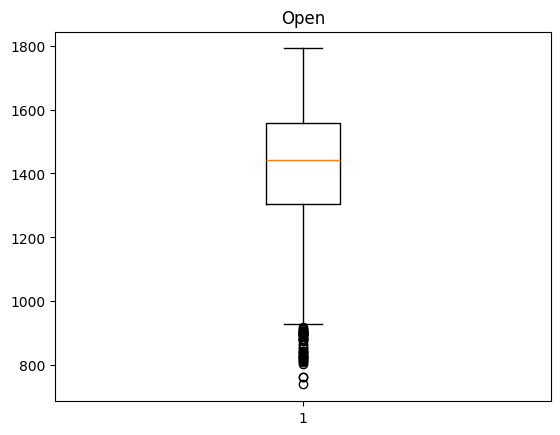

In [88]:
print(df_stock.columns)
print(line_brack)
plt.boxplot(df_stock[df_stock['Ticker'] == stock_name] ['Open'])
plt.title("Open")
plt.show()



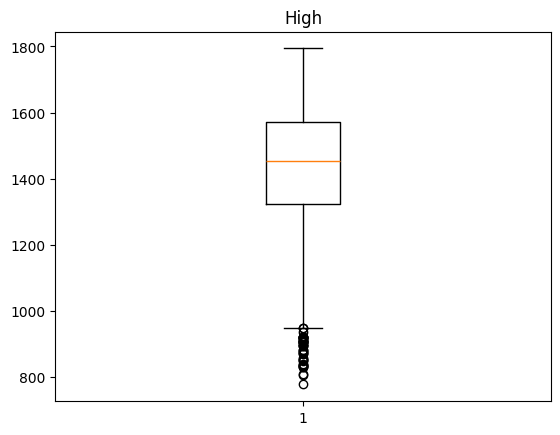

In [89]:
plt.boxplot(df_stock[df_stock['Ticker'] == stock_name] ['High'])
plt.title("High")
plt.show()


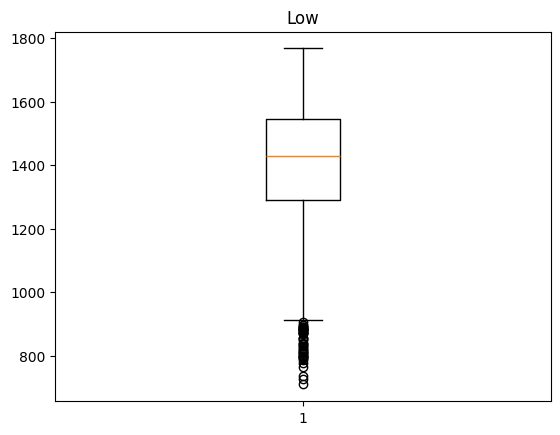

In [90]:

plt.boxplot(df_stock[df_stock['Ticker'] == stock_name] ['Low'])
plt.title("Low")
plt.show()



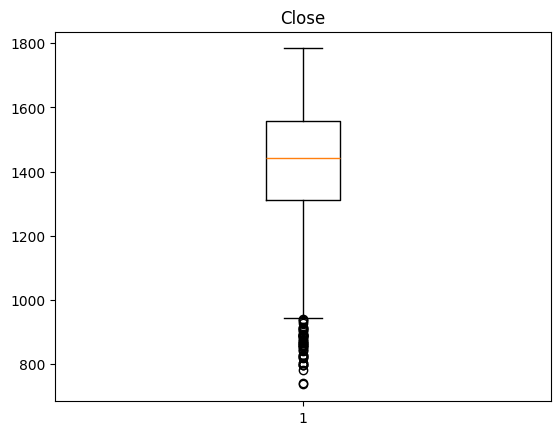

In [91]:
plt.boxplot(df_stock[df_stock['Ticker'] == stock_name] ['Close'])
plt.title("Close")
plt.show()



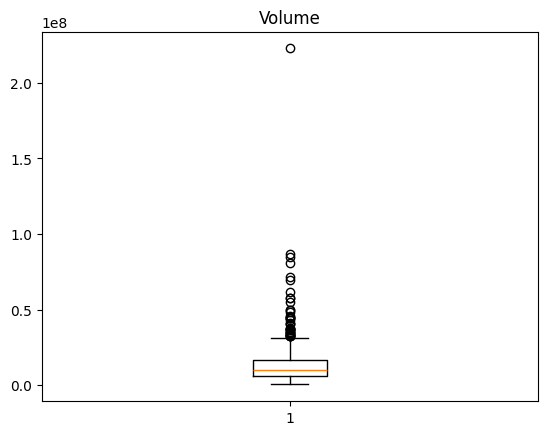

In [92]:

plt.boxplot(df_stock[df_stock['Ticker'] == stock_name] ['Volume'])
plt.title("Volume")
plt.show()


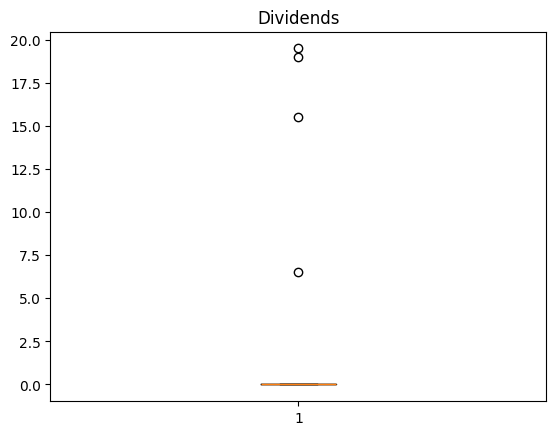

In [93]:

plt.boxplot(df_stock[df_stock['Ticker'] == stock_name] ['Dividends'])
plt.title("Dividends")
plt.show()



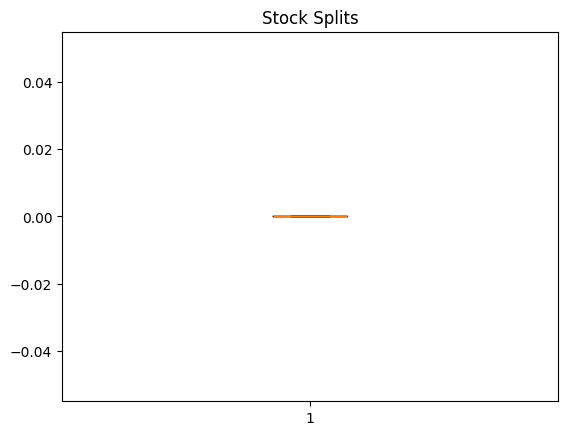

In [94]:
plt.boxplot(df_stock[df_stock['Ticker'] == stock_name] ['Stock Splits'])
plt.title("Stock Splits")
plt.show()

### 11. Are the date formats consistent in the `Date` column?


In [95]:
df_stock.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
Ticker           object
dtype: object

### 12. Should the `Volume` column be transformed (e.g., logarithm)?


### 13. Is the `Ticker` column case-sensitive, and should it be standardized?


# Time Series Analysis

### 14. How does the stock price change over time?

In [96]:
print(df_stock.columns)
print(line_brack)
HDFC = df_stock[df_stock['Ticker']== stock_name]
HDFC['Date'] = pd.to_datetime(HDFC['Date'])
HDFC['Date'] = HDFC['Date'].dt.strftime('%Y-%m-%d')
print(HDFC[['Date', 'Date']].head())

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Ticker'],
      dtype='object')
         Date        Date
0  2019-09-27  2019-09-27
1  2019-09-30  2019-09-30
2  2019-10-01  2019-10-01
3  2019-10-03  2019-10-03
4  2019-10-04  2019-10-04


C:\Users\kakan\AppData\Local\Temp\ipykernel_13916\1529059108.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HDFC['Date'] = pd.to_datetime(HDFC['Date'])
C:\Users\kakan\AppData\Local\Temp\ipykernel_13916\1529059108.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HDFC['Date'] = HDFC['Date'].dt.strftime('%Y-%m-%d')


In [97]:
HDFC['Date'] = pd.to_datetime(HDFC['Date'])  
HDFC.set_index('Date', inplace=True) 
print(line_brack) 
print(df_stock.columns)
print(line_brack) 

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Ticker'],
      dtype='object')


C:\Users\kakan\AppData\Local\Temp\ipykernel_13916\4134594684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HDFC['Date'] = pd.to_datetime(HDFC['Date'])


In [98]:
year_sampel = HDFC.resample('YE')['Close'].max().sort_index()
year_sampel

Date
2019-12-31    1250.276123
2020-12-31    1384.097046
2021-12-31    1628.131836
2022-12-31    1621.264526
2023-12-31    1704.918579
2024-12-31    1783.449951
Freq: YE-DEC, Name: Close, dtype: float64

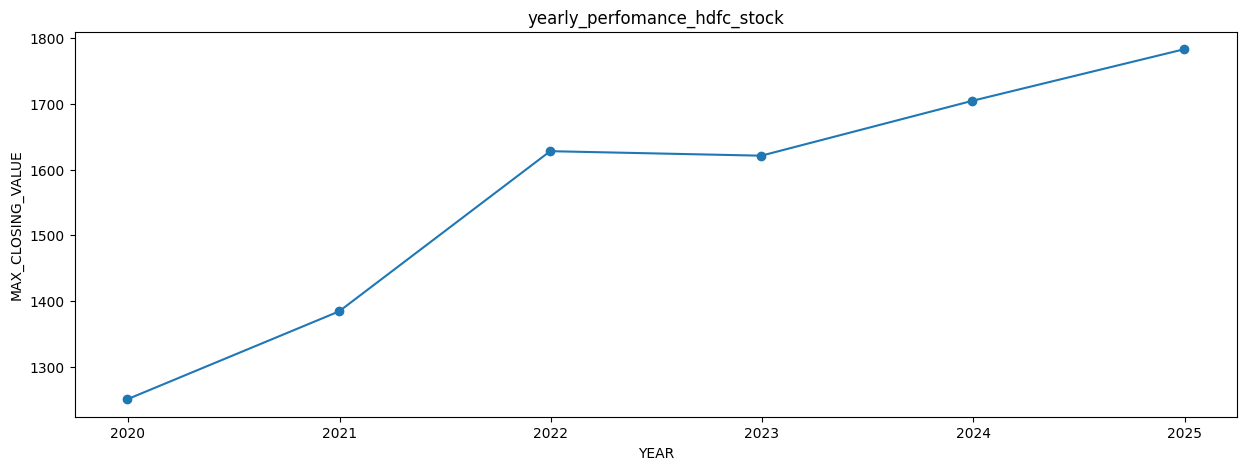

In [99]:

plt.figure(figsize=(15,5))
plt.plot(year_sampel.index,year_sampel.values, marker = 'o')
plt.xlabel("YEAR")
plt.ylabel("MAX_CLOSING_VALUE")
plt.title("yearly_perfomance_hdfc_stock")
plt.show()

# All stocks 

In [100]:
print(df_stock.columns)
print(line_brack)
all_stocks =df_stock
all_stocks['Date'] = pd.to_datetime(all_stocks['Date'])
all_stocks['Date'] = all_stocks['Date'].dt.strftime('%Y-%m-%d')
print(all_stocks[['Date', 'Date']].head())

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Ticker'],
      dtype='object')
         Date        Date
0  2019-09-27  2019-09-27
1  2019-09-30  2019-09-30
2  2019-10-01  2019-10-01
3  2019-10-03  2019-10-03
4  2019-10-04  2019-10-04


In [101]:
all_stocks['Date'] = pd.to_datetime(all_stocks['Date'])  
all_stocks.set_index('Date', inplace=True) 

In [102]:
print(all_stocks.columns)
print(line_brack)
try_ = all_stocks.groupby('Ticker')
try_

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Ticker'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
Index(['Ticker', 'Date', 'Close'], dtype='object')


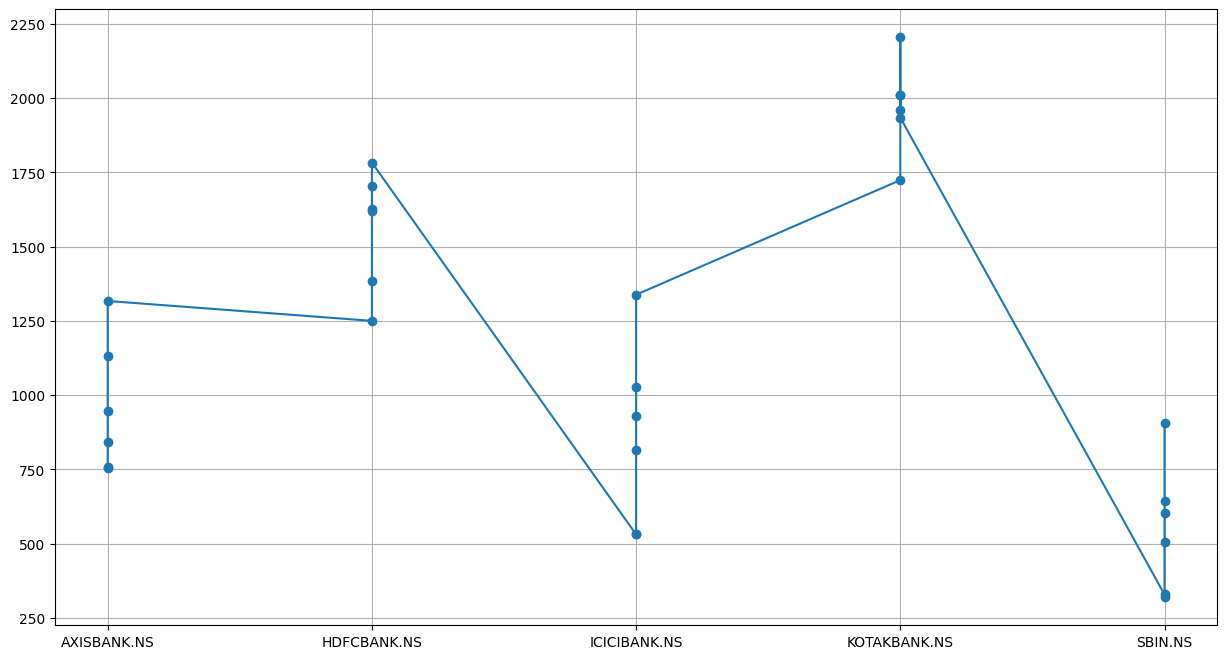

In [103]:
temp =all_stocks

gp = temp[['Ticker','Close']].groupby('Ticker').resample('YE').max('Close')

print(type(gp))


gp.reset_index(inplace=True)

gp.set_index('Ticker')

print(gp.columns)
print(line_brack)

plt.figure(figsize=(15,8))
plt.plot(gp['Ticker'], gp['Close'], marker = 'o')
plt.grid()

In [104]:
gp 

,Ticker,Date,Close
0,AXISBANK.NS,2019-12-31,756.852356
1,AXISBANK.NS,2020-12-31,753.666138
2,AXISBANK.NS,2021-12-31,841.433777
3,AXISBANK.NS,2022-12-31,947.069214
4,AXISBANK.NS,2023-12-31,1131.576660
5,AXISBANK.NS,2024-12-31,1317.300049
6,HDFCBANK.NS,2019-12-31,1250.276123
7,HDFCBANK.NS,2020-12-31,1384.097046
8,HDFCBANK.NS,2021-12-31,1628.131836
9,HDFCBANK.NS,2022-12-31,1621.264526


In [105]:
year_sampel = df_stock.groupby('Ticker').resample('YE')['Volume'].max().sort_index()
year_sampel = pd.DataFrame(year_sampel)

year_sampel.reset_index(inplace=True)
year_sampel['Ticker'].unique()

year_sampel['diff_Volume'] = 0


In [106]:

diff_volume = year_sampel[year_sampel['Ticker'] == stock_name]
diff_volume

,Ticker,Date,Volume,diff_Volume
6,HDFCBANK.NS,2019-12-31,11256610,0
7,HDFCBANK.NS,2020-12-31,44318732,0
8,HDFCBANK.NS,2021-12-31,21412816,0
9,HDFCBANK.NS,2022-12-31,48725485,0
10,HDFCBANK.NS,2023-12-31,86705601,0
11,HDFCBANK.NS,2024-12-31,222671050,0


In [107]:
start_trigger = diff_volume.index.min()
end_trigger = diff_volume.index.max()
#print(end_trigger)

for i in (diff_volume.index):
    #print(i)
    if start_trigger  < i  < end_trigger:
      #  print(i)
        k = diff_volume.loc[i]['Volume']-diff_volume.loc[i-1]['Volume']
        #print(k)
        #print(line_brack)
        diff_volume.loc[i, 'diff_Volume'] = k
        
diff_volume

,Ticker,Date,Volume,diff_Volume
6,HDFCBANK.NS,2019-12-31,11256610,0
7,HDFCBANK.NS,2020-12-31,44318732,33062122
8,HDFCBANK.NS,2021-12-31,21412816,-22905916
9,HDFCBANK.NS,2022-12-31,48725485,27312669
10,HDFCBANK.NS,2023-12-31,86705601,37980116
11,HDFCBANK.NS,2024-12-31,222671050,0


In [108]:
volumne_ =  diff_volume[diff_volume['diff_Volume'] != 0]
volumne_

,Ticker,Date,Volume,diff_Volume
7,HDFCBANK.NS,2020-12-31,44318732,33062122
8,HDFCBANK.NS,2021-12-31,21412816,-22905916
9,HDFCBANK.NS,2022-12-31,48725485,27312669
10,HDFCBANK.NS,2023-12-31,86705601,37980116


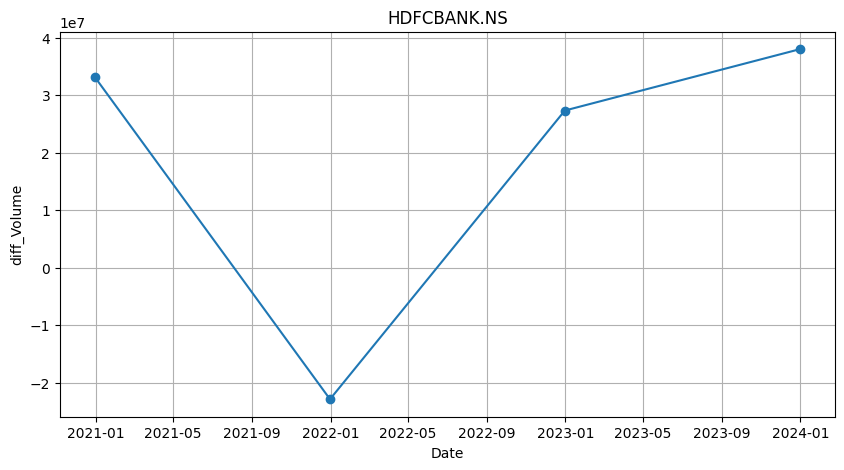

In [109]:
volumne_

plt.figure(figsize=(10,5))
plt.plot(volumne_['Date'], volumne_['diff_Volume'],marker = 'o')
plt.grid()

plt.title(stock_name)

plt.xlabel('Date')
plt.ylabel('diff_Volume')

plt.show()

### 15. What are the average daily returns for each stock?

In [110]:
lat_10days_perfomance= HDFC.tail(10)
lat_10days_perfomance.reset_index(inplace=True)


In [111]:
lat_10days_perfomance['Returen'] = 0

C:\Users\kakan\AppData\Local\Temp\ipykernel_13916\792720248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_10days_perfomance['Returen'] = 0


In [112]:
lat_10days_perfomance

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Returen
0,2024-09-16,1667.000000,1677.800049,1664.050049,1670.949951,7586410,0.0,0.0,HDFCBANK.NS,0
1,2024-09-17,1678.000000,1678.000000,1664.150024,1668.800049,10063561,0.0,0.0,HDFCBANK.NS,0
2,2024-09-18,1671.849976,1698.900024,1671.099976,1694.800049,20458671,0.0,0.0,HDFCBANK.NS,0
3,2024-09-19,1699.199951,1719.000000,1699.150024,1708.500000,15325888,0.0,0.0,HDFCBANK.NS,0
4,2024-09-20,1716.500000,1744.949951,1707.550049,1741.199951,30311693,0.0,0.0,HDFCBANK.NS,0
5,2024-09-23,1749.000000,1766.349976,1740.250000,1759.800049,13482675,0.0,0.0,HDFCBANK.NS,0
6,2024-09-24,1765.000000,1781.650024,1754.250000,1768.050049,16519518,0.0,0.0,HDFCBANK.NS,0
7,2024-09-25,1760.150024,1788.000000,1760.150024,1779.099976,15982656,0.0,0.0,HDFCBANK.NS,0
8,2024-09-26,1773.050049,1788.000000,1768.050049,1783.449951,15949822,0.0,0.0,HDFCBANK.NS,0
9,2024-09-27,1777.000000,1778.199951,1750.000000,1752.650024,17805173,0.0,0.0,HDFCBANK.NS,0


### 16. How does the trading volume change over time?


In [113]:
year_sampel

,Ticker,Date,Volume,diff_Volume
0,AXISBANK.NS,2019-12-31,49442205,0
1,AXISBANK.NS,2020-12-31,96186227,0
2,AXISBANK.NS,2021-12-31,64303975,0
3,AXISBANK.NS,2022-12-31,58057724,0
4,AXISBANK.NS,2023-12-31,36394389,0
5,AXISBANK.NS,2024-12-31,46136295,0
6,HDFCBANK.NS,2019-12-31,11256610,0
7,HDFCBANK.NS,2020-12-31,44318732,0
8,HDFCBANK.NS,2021-12-31,21412816,0
9,HDFCBANK.NS,2022-12-31,48725485,0


In [114]:
df_stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Ticker'],
      dtype='object')

In [115]:
year_sampel = df_stock.groupby('Ticker').resample('YE')['Volume'].max().sort_index()
year_sampel = pd.DataFrame(year_sampel)

year_sampel.reset_index(inplace=True)
year_sampel['Ticker'].unique()

year_sampel['diff_Volume'] = 0


In [116]:
#array(['AXISBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS',   'SBIN.NS'], dtype=object)

diff_volume = year_sampel[year_sampel['Ticker'] == stock_name]
diff_volume

,Ticker,Date,Volume,diff_Volume
6,HDFCBANK.NS,2019-12-31,11256610,0
7,HDFCBANK.NS,2020-12-31,44318732,0
8,HDFCBANK.NS,2021-12-31,21412816,0
9,HDFCBANK.NS,2022-12-31,48725485,0
10,HDFCBANK.NS,2023-12-31,86705601,0
11,HDFCBANK.NS,2024-12-31,222671050,0


In [117]:
start_trigger = diff_volume.index.min()
end_trigger = diff_volume.index.max()
#print(end_trigger)

for i in (diff_volume.index):
    #print(i)
    if start_trigger  < i  < end_trigger:
      #  print(i)
        k = diff_volume.loc[i]['Volume']-diff_volume.loc[i-1]['Volume']
        #print(k)
        #print(line_brack)
        diff_volume.loc[i, 'diff_Volume'] = k
        
diff_volume
    

,Ticker,Date,Volume,diff_Volume
6,HDFCBANK.NS,2019-12-31,11256610,0
7,HDFCBANK.NS,2020-12-31,44318732,33062122
8,HDFCBANK.NS,2021-12-31,21412816,-22905916
9,HDFCBANK.NS,2022-12-31,48725485,27312669
10,HDFCBANK.NS,2023-12-31,86705601,37980116
11,HDFCBANK.NS,2024-12-31,222671050,0


In [118]:
volumne_ =  diff_volume[diff_volume['diff_Volume'] != 0]
volumne_

,Ticker,Date,Volume,diff_Volume
7,HDFCBANK.NS,2020-12-31,44318732,33062122
8,HDFCBANK.NS,2021-12-31,21412816,-22905916
9,HDFCBANK.NS,2022-12-31,48725485,27312669
10,HDFCBANK.NS,2023-12-31,86705601,37980116


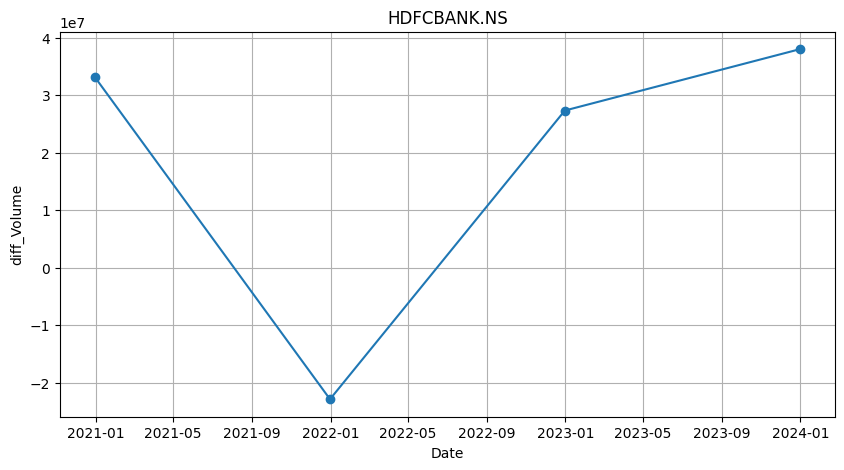

In [119]:
volumne_

plt.figure(figsize=(10,5))
plt.plot(volumne_['Date'], volumne_['diff_Volume'],marker = 'o')
plt.grid()

plt.title(stock_name)

plt.xlabel('Date')
plt.ylabel('diff_Volume')

plt.show()

### 17. What is the trend in stock prices over different time periods (daily, weekly, monthly)?


In [120]:
#### 17. What is the trend in stock prices over different time periods (daily, weekly, monthly)?

data_set_17 =   df_stock[df_stock['Ticker'] == stock_name] 

daily_30_days = data_set_17.resample('D').max().tail(30)

daily_30_days =daily_30_days[daily_30_days['Ticker'] != 0 ]
daily_30_days = daily_30_days.dropna()

daily_30_days

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2024-08-29,1642.000000,1644.400024,1631.150024,1638.550049,24526302.0,0.0,0.0,HDFCBANK.NS
2024-08-30,1656.000000,1662.000000,1621.150024,1636.900024,222671050.0,0.0,0.0,HDFCBANK.NS
2024-09-02,1646.800049,1646.800049,1623.199951,1626.949951,17024840.0,0.0,0.0,HDFCBANK.NS
2024-09-03,1634.000000,1639.949951,1624.599976,1637.349976,18641430.0,0.0,0.0,HDFCBANK.NS
2024-09-04,1639.000000,1644.800049,1632.000000,1641.800049,12341372.0,0.0,0.0,HDFCBANK.NS
2024-09-05,1646.000000,1649.900024,1642.000000,1645.449951,11438159.0,0.0,0.0,HDFCBANK.NS
2024-09-06,1638.300049,1647.750000,1634.099976,1636.949951,13014801.0,0.0,0.0,HDFCBANK.NS
2024-09-09,1638.000000,1648.500000,1630.099976,1646.500000,11896457.0,0.0,0.0,HDFCBANK.NS
2024-09-10,1654.000000,1654.000000,1638.000000,1650.349976,13303323.0,0.0,0.0,HDFCBANK.NS


In [121]:
weekly_1_month = daily_30_days.resample('W').max()
weekly_1_month['Ticker'] = stock_name

weekly_1_month

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2024-09-01,1656.000000,1662.000000,1631.150024,1638.550049,222671050.0,0.0,0.0,HDFCBANK.NS
2024-09-08,1646.800049,1649.900024,1642.000000,1645.449951,18641430.0,0.0,0.0,HDFCBANK.NS
2024-09-15,1674.000000,1674.000000,1657.050049,1666.599976,16212023.0,0.0,0.0,HDFCBANK.NS
2024-09-22,1716.500000,1744.949951,1707.550049,1741.199951,30311693.0,0.0,0.0,HDFCBANK.NS
2024-09-29,1777.000000,1788.000000,1768.050049,1783.449951,17805173.0,0.0,0.0,HDFCBANK.NS


In [122]:
monthly_1year = data_set_17.resample('ME').max().tail(12)
monthly_1year

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2023-10-31,1534.791783,1534.791783,1514.321315,1528.971191,27780899,0.0,0.0,HDFCBANK.NS
2023-11-30,1548.011205,1551.266677,1521.374936,1538.145996,34745720,0.0,0.0,HDFCBANK.NS
2023-12-31,1686.273199,1698.210169,1679.071492,1686.223877,69418565,0.0,0.0,HDFCBANK.NS
2024-01-31,1683.017598,1686.125187,1669.206199,1676.210571,85072618,0.0,0.0,HDFCBANK.NS
2024-02-29,1455.129536,1460.900704,1436.434898,1446.596069,45660405,0.0,0.0,HDFCBANK.NS
2024-03-31,1445.757590,1451.775390,1430.565026,1440.726318,71806902,0.0,0.0,HDFCBANK.NS
2024-04-30,1536.419530,1536.419530,1520.783118,1528.675293,44467533,0.0,0.0,HDFCBANK.NS
2024-05-31,1530.099976,1545.000000,1524.800049,1531.550049,37039794,19.5,0.0,HDFCBANK.NS
2024-06-30,1707.949951,1716.949951,1691.099976,1711.349976,45065598,0.0,0.0,HDFCBANK.NS


In [123]:
print(monthly_1year.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Ticker'],
      dtype='object')


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Ticker'],
      dtype='object')


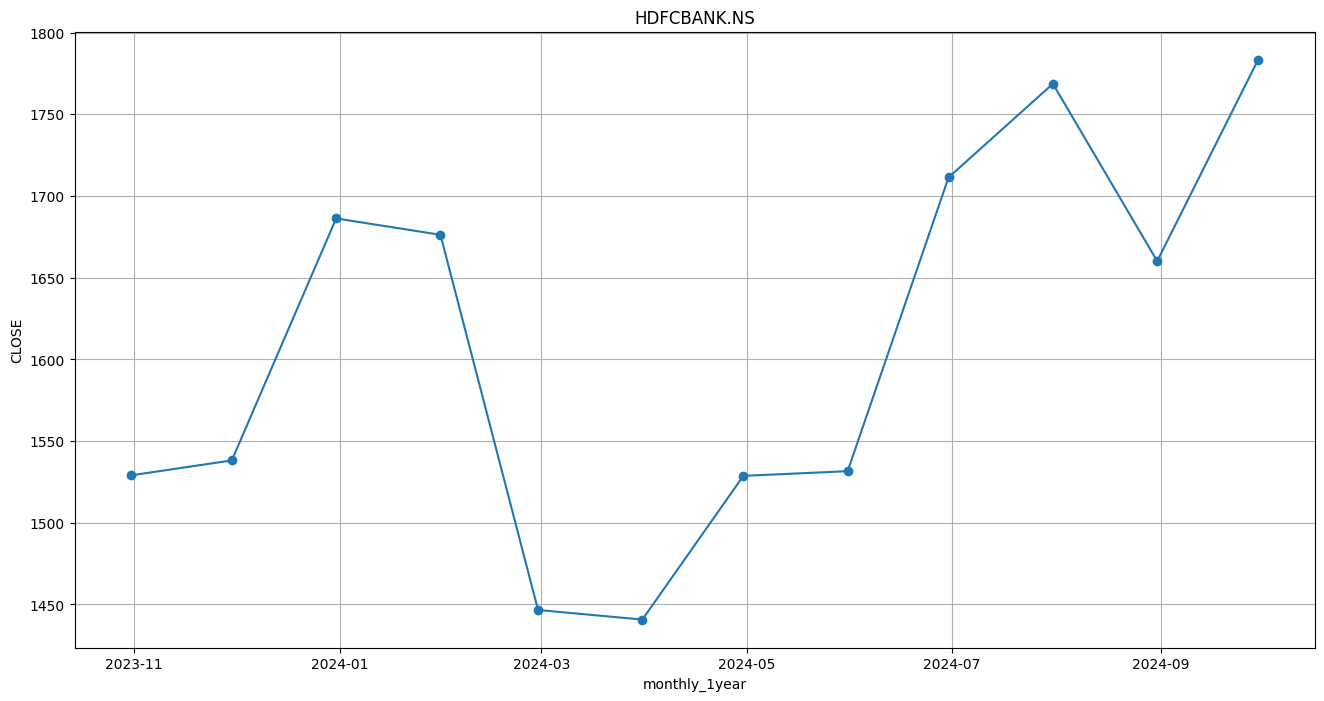

In [124]:
### 17. What is the trend in stock prices over different time periods (daily, weekly, monthly)?

#monthly_1year
monthly_1year
print(monthly_1year.columns)
print(line_brack)

plt.figure(figsize=(16,8))
plt.plot(monthly_1year.index, monthly_1year['Close'], marker = 'o')
plt.grid()
plt.title(stock_name)
plt.xlabel('monthly_1year')
plt.ylabel('CLOSE')

plt.show()

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Ticker'],
      dtype='object')
(5, 8)


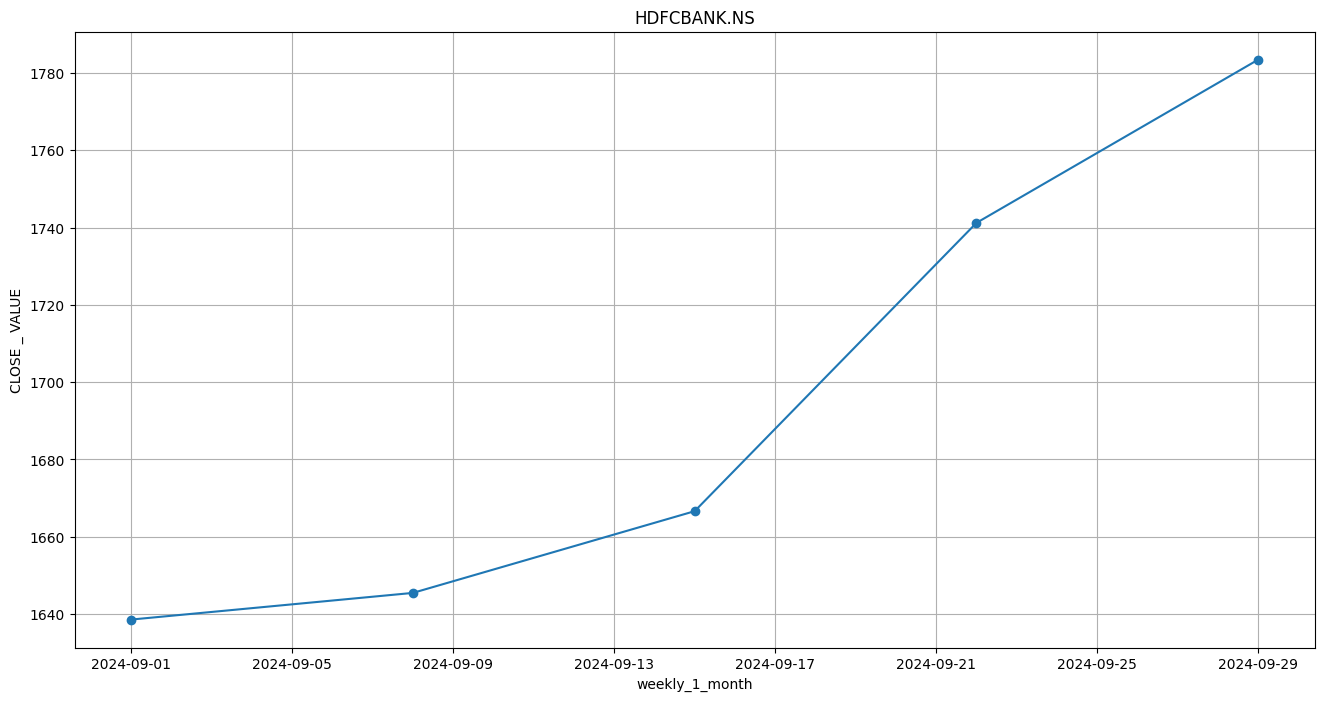

In [125]:
weekly_1_month
print(weekly_1_month.columns)
print(line_brack)
print(weekly_1_month.shape)

plt.figure(figsize=(16,8))
plt.plot(weekly_1_month.index, weekly_1_month['Close'], marker = 'o')
plt.grid()
plt.title(stock_name)
plt.xlabel('weekly_1_month')
plt.ylabel('CLOSE _ VALUE')

plt.show()

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Ticker'],
      dtype='object')
(22, 8)


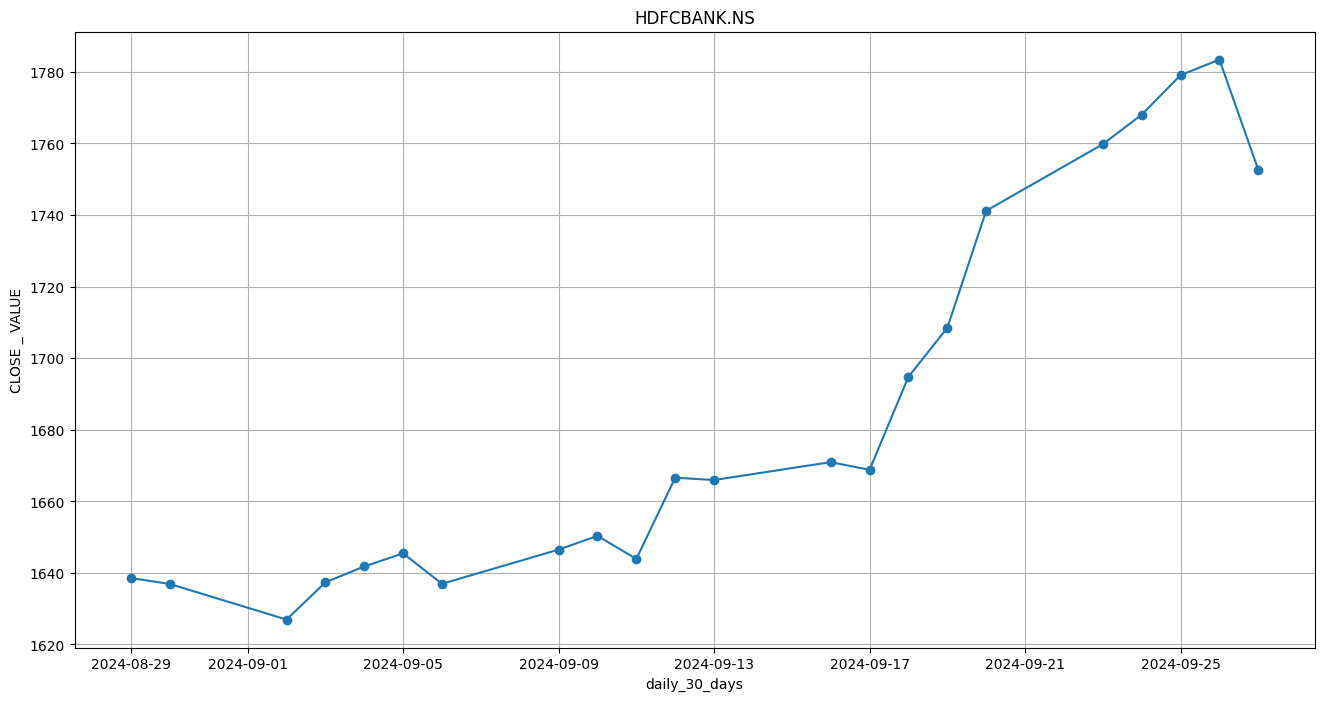

In [126]:
daily_30_days

print(daily_30_days.columns)
print(line_brack)
print(daily_30_days.shape)

plt.figure(figsize=(16,8))
plt.plot(daily_30_days.index, daily_30_days['Close'], marker = 'o')
plt.grid()
plt.title(stock_name)
plt.xlabel('daily_30_days')
plt.ylabel('CLOSE _ VALUE')

plt.show()

# Visualization

### 20. What does the price trend look like over time for each stock?


### 21. How does the volume traded vary by year?


         Ticker       Date    Volume  diff_Volume
7   HDFCBANK.NS 2020-12-31  44318732     33062122
8   HDFCBANK.NS 2021-12-31  21412816    -22905916
9   HDFCBANK.NS 2022-12-31  48725485     27312669
10  HDFCBANK.NS 2023-12-31  86705601     37980116


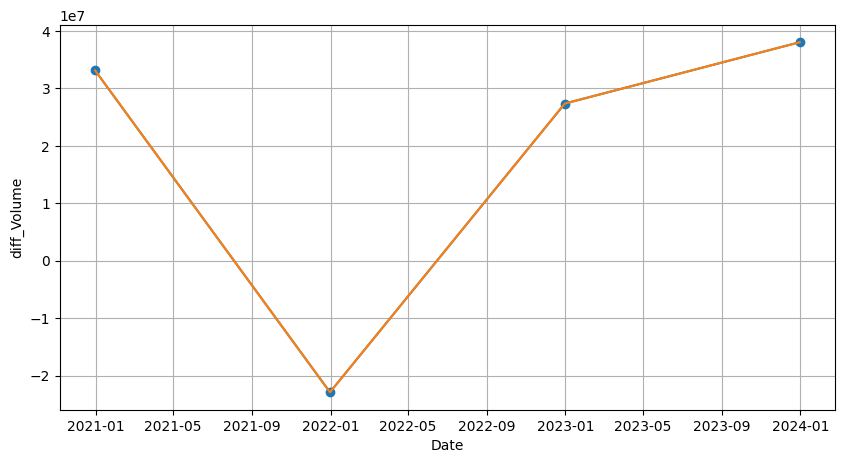

In [127]:
print(volumne_)

#plt.bar(volumne_['Date'], volumne_['diff_Volume'])


plt.figure(figsize=(10,5))
plt.plot(volumne_['Date'], volumne_['diff_Volume'],marker = 'o')
plt.grid()


sns.lineplot(data=volumne_ ,x = volumne_['Date'] , y = volumne_['diff_Volume'])
plt.show()

### 22. What is the distribution of closing prices?


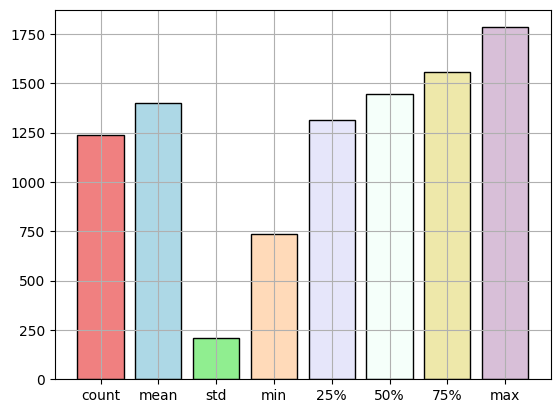

In [128]:
distribution_ =  df_stock[df_stock['Ticker'] == stock_name]['Close'].describe()

plt.bar(distribution_.index,distribution_.values ,color = colors, edgecolor = 'black')
plt.grid()
plt.show()

### 23. What are the distributions of daily returns?


In [129]:
df_23 = df_stock[df_stock['Ticker'] == stock_name] 

df_23 = df_23.resample('D').max().tail(30)

df_23.dropna(inplace=True)

df_23.reset_index(inplace=True)

df_23['Profit'] = 0

start = df_23.index.min()
end = df_23.index.max()

print(df_23.columns)
for i in df_23.index:
  #  print(i)
    if start < i < end:
        #print(i)
    
        k = df_23.loc[i]['Close'] - df_23.loc[i-1]['Close']
        #print(k)
        df_23.loc[i,'Profit'] = k
        
df_23=df_23[df_23['Profit'] != 0.000000]

df_23 = df_23[['Date','Profit']]


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Ticker', 'Profit'],
      dtype='object')


C:\Users\kakan\AppData\Local\Temp\ipykernel_13916\906177396.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.6500244140625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_23.loc[i,'Profit'] = k


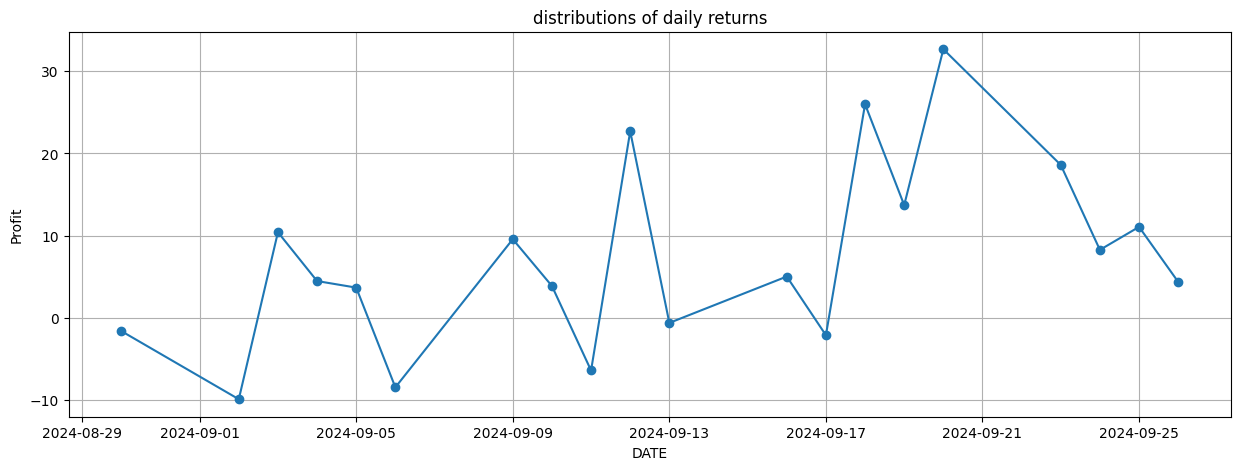

In [130]:
df_23

plt.figure(figsize=(15,5))  
plt.plot(df_23['Date'],df_23['Profit'], marker = 'o')
plt.grid()

plt.title('distributions of daily returns')
plt.xlabel('DATE')
plt.ylabel('Profit')
plt.show()


,Date,Profit
1,2024-08-30,-1.650024
2,2024-09-02,-9.950073
3,2024-09-03,10.400024
4,2024-09-04,4.450073
5,2024-09-05,3.649902
6,2024-09-06,-8.500000
7,2024-09-09,9.550049
8,2024-09-10,3.849976
9,2024-09-11,-6.449951
10,2024-09-12,22.699951


### 24. Can we visualize the relationship between `Open` and `Close` prices?


In [132]:
df_24 = df_stock[df_stock['Ticker'] == stock_name] 


df_24 = df_24.resample('D').max().tail(30)

df_24.dropna(inplace=True)



start = df_23.index.min()
end = df_23.index.max()
df_24

df_24 = df_24[['Open','Close']]


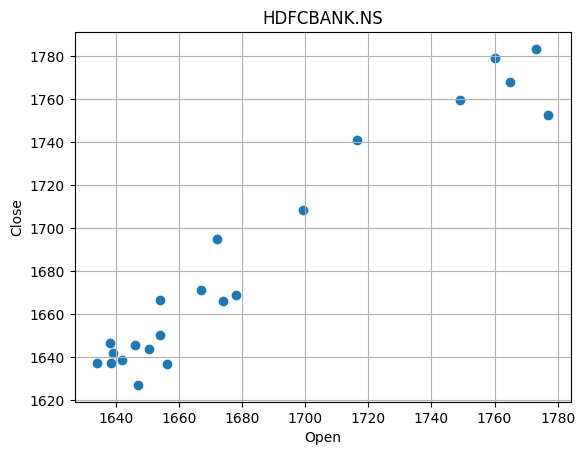

In [133]:
df_24

plt.scatter(df_24['Open'],df_24['Close'])

plt.grid()
plt.xlabel('Open')
plt.ylabel('Close')
plt.title(stock_name)

plt.show()

### 27. How do different stocks compare in terms of average closing price?


In [134]:
closing_mean_24 =  all_stocks.groupby('Ticker').resample('YE').mean()
print(closing_mean_24.columns)
print(line_brack)
closing_mean_24
closing_mean_24 = closing_mean_24['Close']
closing_mean_24

closing_mean_24 = pd.DataFrame(closing_mean_24) 
closing_mean_24.reset_index(inplace=True)    
print(closing_mean_24.head(5))
print(line_brack)
print(type(closing_mean_24))
print(closing_mean_24.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
        Ticker       Date       Close
0  AXISBANK.NS 2019-12-31  720.972937
1  AXISBANK.NS 2020-12-31  513.919173
2  AXISBANK.NS 2021-12-31  727.472274
3  AXISBANK.NS 2022-12-31  760.894594
4  AXISBANK.NS 2023-12-31  950.534926
<class 'pandas.core.frame.DataFrame'>
Index(['Ticker', 'Date', 'Close'], dtype='object')


C:\Users\kakan\AppData\Local\Temp\ipykernel_13916\2606711956.py:6: UserWarning: The palette list has more values (13) than needed (5), which may not be intended.
  sns.barplot(x= 'Date',hue='Ticker', y = 'Close',data=closing_mean_24, palette=colors,edgecolor = 'black')


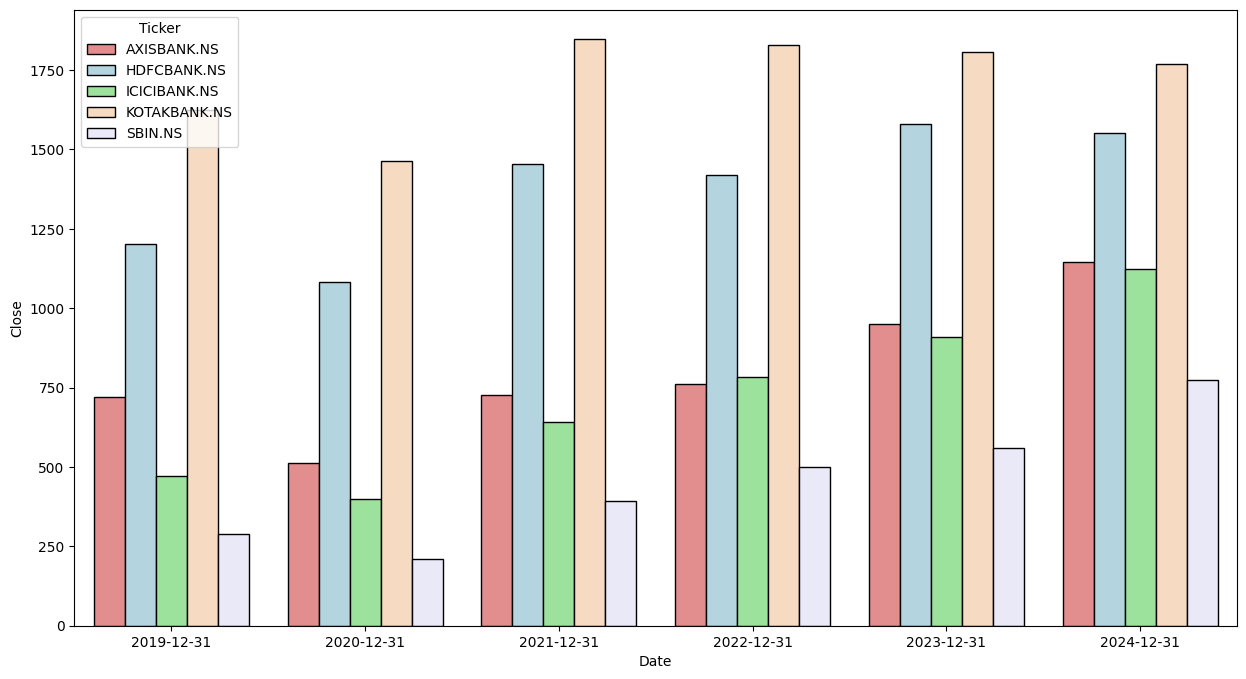

In [135]:
closing_mean_24
#plt.hist(closing_mean_24[''], bins = 50)
plt.figure(figsize=(15,8))
#plt.bar(closing_mean_24['Date'],closing_mean_24['Close'],color=colors, edgecolor = 'black' )

sns.barplot(x= 'Date',hue='Ticker', y = 'Close',data=closing_mean_24, palette=colors,edgecolor = 'black')


#plt.plot(closing_mean_24['Date'],closing_mean_24['Close'])

#plt.scatter(closing_mean_24['Ticker'],closing_mean_24['Close'])


#plt.hist(closing_mean_24['Close'], bins=50)
plt.show()
